In [1]:
import os 
from pathlib import Path
import numpy as np 
import pandas as pd
import cv2
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNet
import  tensorflow.keras.layers as L
from matplotlib import pyplot as plt


KeyboardInterrupt



In [3]:
PATH = 'crop_part1'

In [4]:
paths = os.listdir(PATH)

In [5]:
len(paths)


9780

In [6]:
labels = np.array([ float(path.split('_')[0]) for path in paths])

In [30]:
labels


array([100., 100., 101., ...,   9.,   9.,   9.])

In [28]:
image_dir = Path(PATH)
filepaths = pd.Series(list(image_dir.glob(r'*.jpg')), name='Filepath').astype(str)
print(filepaths)
ages = pd.Series(filepaths.apply(lambda _: os.path.split(_)[1]), name='Age').astype(str)
# ages = pd.Series(filepaths.apply(os.path.split(os.path.split('_')[1])), name='Age').astype(np.int)
ages=pd.Series(ages.apply(lambda _: os.path.split(_)[1]), name='Age').astype(str)
# path.split('_')[0]
images = pd.concat([filepaths, ages], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

0       crop_part1\100_1_0_20170110183726390.jpg.chip.jpg
1       crop_part1\100_1_2_20170105174847679.jpg.chip.jpg
2       crop_part1\101_1_2_20170105174739309.jpg.chip.jpg
3        crop_part1\10_0_0_20161220222308131.jpg.chip.jpg
4        crop_part1\10_0_0_20170103200329407.jpg.chip.jpg
                              ...                        
9775      crop_part1\9_1_3_20161220222856346.jpg.chip.jpg
9776      crop_part1\9_1_3_20170104222949455.jpg.chip.jpg
9777      crop_part1\9_1_4_20170103200637399.jpg.chip.jpg
9778      crop_part1\9_1_4_20170103200814791.jpg.chip.jpg
9779      crop_part1\9_1_4_20170103213057382.jpg.chip.jpg
Name: Filepath, Length: 9780, dtype: object


In [29]:
ages

0       100_1_0_20170110183726390.jpg.chip.jpg
1       100_1_2_20170105174847679.jpg.chip.jpg
2       101_1_2_20170105174739309.jpg.chip.jpg
3        10_0_0_20161220222308131.jpg.chip.jpg
4        10_0_0_20170103200329407.jpg.chip.jpg
                         ...                  
9775      9_1_3_20161220222856346.jpg.chip.jpg
9776      9_1_3_20170104222949455.jpg.chip.jpg
9777      9_1_4_20170103200637399.jpg.chip.jpg
9778      9_1_4_20170103200814791.jpg.chip.jpg
9779      9_1_4_20170103213057382.jpg.chip.jpg
Name: Age, Length: 9780, dtype: object

In [13]:
def format_image(path):
    img = cv2.imread(PATH + '/' + path)
    img = cv2.resize(img,(128,128))
    return img

In [14]:
data = np.array([format_image(path) for path in paths])

In [31]:
train_x,test_x,train_y,test_y = train_test_split(data,labels,test_size=0.2)
print(train_x)

NameError: name 'data' is not defined

In [16]:
model = Sequential([
                  MobileNet(input_shape=(128,128,3),
                            include_top=False,
                            pooling='avg',
                            weights='imagenet'),
                            L.Dense(1)
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
Total params: 3,229,889
Trainable params: 3,208,001
Non-trainable params: 21,888
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',loss='mae',metrics='mae')

In [19]:
?model.fit()

Object `model.fit()` not found.


In [20]:
model.fit(
    train_x,
    train_y,
    batch_size=64,
    epochs=4,
    validation_data=(test_x,test_y)
)

Epoch 1/4
123/123 [==============================] - 521s 4s/step - loss: 8.8329 - mae: 8.8329 - val_loss: 12.2518 - val_mae: 12.2518
Epoch 2/4
123/123 [==============================] - 510s 4s/step - loss: 5.3936 - mae: 5.3936 - val_loss: 5.8709 - val_mae: 5.8709
Epoch 3/4
123/123 [==============================] - 507s 4s/step - loss: 4.4783 - mae: 4.4783 - val_loss: 7.5101 - val_mae: 7.5101
Epoch 4/4
123/123 [==============================] - 503s 4s/step - loss: 4.0170 - mae: 4.0170 - val_loss: 5.1501 - val_mae: 5.1501


In [132]:
def face_detect(im_path):
    face_detected = False  # Used to see if we've detected the face.
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    im = cv2.imread(im_path)
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
        )
        
    if not face_detected and len(faces)!=0:
        face_detected = True
    return face_detected

In [79]:
test_pic = cv2.imread('LinkedInPic.jpg')
image = cv2.cvtColor(test_pic,cv2.COLOR_BGR2RGB)

In [80]:
test_pic = cv2.resize(image,(128,128))

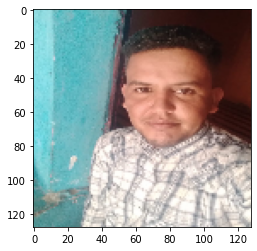

In [81]:
plt.imshow(test_pic)
plt.show()

In [24]:
test_pic = test_pic.reshape((1,128,128,3))

In [25]:
pred = model.predict(test_pic)

In [27]:
int(pred[0])

21

In [143]:
def predict_age(img_path):
    
    if face_detect(img_path):
        pic = cv2.imread(img_path)
        imColor = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
        pic = cv2.resize(pic,(128,128))
        pic = pic.reshape((1,128,128,3))
        pred = model.predict(pic)
        return pred
    else:
        print('ne detecter pas un visage')
    

In [168]:
# img_path = 'crop_part1/4_1_3_20161219230310713.jpg.chip.jpg'
img_path = '20-50/test/20/29076.jpg'
# img_path = 'Mauritanie.jpg'

age = predict_age(img_path)
if age:
    print(int(age))


    

ne detecter pas un visage
